IMPORTING LIBRARIES

In [1]:
import os
import pandas as pd
import numpy as np
import librosa
import tensorflow
from tensorflow.keras.preprocessing.sequence import pad_sequences

LOADING THE DATASET

In [2]:
dataset_path="E:/final year project/dataset"
dataset_map="E:/final year project/dataset/speech_emotion_recognisition.csv"
if not os.path.exists(dataset_map):
    print("Data csv file couldnt be loaded")
elif not os.path.exists(dataset_path):
    print("Data couldn't be loaded")
else:
    print("Data loaded succesfully")

Data loaded succesfully


In [3]:
speech_df=pd.read_csv(dataset_map)
speech_df=speech_df[speech_df['Emotion']!='Surprised']
speech_df=speech_df[speech_df['Emotion']!='Calm']
speech_df = speech_df.drop(speech_df.columns[0], axis=1)
print(speech_df)

      Emotion                  Filename
0       Angry       1001_DFA_ANG_XX.wav
1     Disgust       1001_DFA_DIS_XX.wav
2        Fear       1001_DFA_FEA_XX.wav
3       Happy       1001_DFA_HAP_XX.wav
4     Neutral       1001_DFA_NEU_XX.wav
...       ...                       ...
8869  Disgust  03-01-07-01-02-02-24.wav
8870  Disgust  03-01-07-02-01-01-24.wav
8871  Disgust  03-01-07-02-01-02-24.wav
8872  Disgust  03-01-07-02-02-01-24.wav
8873  Disgust  03-01-07-02-02-02-24.wav

[8498 rows x 2 columns]


FEATURE EXTRACTION

DEFINING FUNCTION FO ZCR

In [4]:
def get_zcr(y,frame_length, hop_length,maxlen):
    zcr=librosa.feature.zero_crossing_rate(y=y, frame_length=frame_length, hop_length=hop_length)
    return pad_sequences([zcr.T], maxlen=maxlen,truncating="post",padding="post")
# y,sr =librosa.load("E:/final year project/dataset/Calm/03-01-02-01-01-01-01.wav")
# print(y)
# zcr=get_zcr(y=y,frame_length=2048,hop_length=512,maxlen=130)
# print(zcr.shape)

DEFINING FUNCTION FOR RMS ENERGY

In [5]:
def get_rms(y,frame_length, hop_length,maxlen):
    rms=librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)
    return pad_sequences([rms.T], maxlen=maxlen,truncating="post",padding="post")

# rms=get_rms(y=y,frame_length=2048,hop_length=512,maxlen=130)
# print(rms.shape)

DEFINING FUNCTION FOR MFCC

In [6]:
# def get_mfcc(y,sr,n_mfcc,hop_length,maxlen):
def get_mfcc(y,sr,n_mfcc):

    # mfcc=librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc,hop_length=hop_length)
    mfcc=librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return mfcc
    # return pad_sequences([mfcc.T], maxlen=maxlen,truncating="post",padding="post")
# mfcc=get_mfcc(y=y,sr=16000,n_mfcc=13,hop_length=512,maxlen=130)
# print(mfcc.shape)


DEFINING MELSPECTOGRAM FUNCTION

In [7]:
# def get_melspec(y,sr,n_fft,n_mels,hop_length,fmin,maxlen):
def get_melspec(y,sr):
    # mel_spec=librosa.feature.melspectrogram(y=y,sr=sr,n_fft=n_fft,n_mels=n_mels,hop_length=hop_length,fmin=fmin)
    mel_spec=librosa.feature.melspectrogram(y=y,sr=sr)
    # mel_spec_db=librosa.power_to_db(mel_spec,ref=np.max)
    return mel_spec
    #return pad_sequences(mel_spec_db,maxlen=maxlen,truncating="post",padding="post")
# mel_spec_db=get_melspec(y,sr,1024,64,512,50,130)
# print(mel_spec_db.shape)

COLLECTING THE FEATURES

In [8]:
# Defining the params value
FRAME_LENGTH=2048
HOP_LENGTH=512
N_MFCC=40
N_FFT=1024
MAX_LENGTH=130
N_MELS=128
FMIN=50
zcr_list=[]
rmse_list=[]
mfcc_list=[]
mel_spec_list=[]
labels=[]
# Iterating over each row
for index, row in speech_df.iterrows():
    path=os.path.join(dataset_path,row['Emotion'],row['Filename'])
    y,sr=librosa.load(path)
    # zcr=get_zcr(y,FRAME_LENGTH,HOP_LENGTH,MAX_LENGTH)
    # zcr_list.append(zcr)
    # rmse=get_rms(y,FRAME_LENGTH,HOP_LENGTH,MAX_LENGTH)
    # rmse_list.append(rmse)
    mfcc=get_mfcc(y,sr,N_MFCC)
    mfcc_list.append(np.mean(mfcc.T,axis=0))
    mel_spec=get_melspec(y,sr)
    mel_spec_list.append(np.mean(mel_spec.T,axis=0))
    labels.append(row['Emotion'])
    print("Values calculated for ",index)

    


Values calculated for  0
Values calculated for  1
Values calculated for  2
Values calculated for  3
Values calculated for  4
Values calculated for  5
Values calculated for  6
Values calculated for  7
Values calculated for  8
Values calculated for  9
Values calculated for  10
Values calculated for  11
Values calculated for  12
Values calculated for  13
Values calculated for  14
Values calculated for  15
Values calculated for  16
Values calculated for  17
Values calculated for  18
Values calculated for  19
Values calculated for  20
Values calculated for  21
Values calculated for  22
Values calculated for  23
Values calculated for  24
Values calculated for  25
Values calculated for  26
Values calculated for  27
Values calculated for  28
Values calculated for  29
Values calculated for  30
Values calculated for  31
Values calculated for  32
Values calculated for  33
Values calculated for  34
Values calculated for  35
Values calculated for  36
Values calculated for  37
Values calculated for 

CONVERTING LIST INTO NUMPY ARRAY

In [9]:
zcr_array=np.array(zcr_list)
rmse_array=np.array(rmse_list)
mfcc_array=np.array(mfcc_list)
mel_spec_array=np.array(mel_spec_list)
print(mel_spec_array.shape)
print(mfcc_array.shape)

(8498, 128)
(8498, 40)


In [10]:
# mel_spec_array = mel_spec_array.reshape(8498, 1, 130, 128)  # (samples, channels, time, freq_bins)
# mfcc_array = mfcc_array.reshape(8498, 1, 130, 13)  # (samples, channels, time, coefficients)

features=np.concatenate([mfcc_array,mel_spec_array],axis=-1)
features=features.astype('float32')
Emotions=np.asarray(labels)

features.shape

(8498, 168)

In [11]:
# features=features.reshape(features.shape[0],-1)
# features_df=pd.DataFrame(features)
# features_df['Labels']=Emotions

In [12]:
# features_csv=features_df.to_csv(os.path.join(dataset_path,"Features.csv"))

In [13]:
# features_df.shape

In [14]:
# melspec_db_features=mel_spec_array.reshape(mel_spec_array.shape[0],-1)
# melspec_db_df=pd.DataFrame(melspec_db_features)
# mel_spec_array.shape

DATA PREPROCESSING

In [15]:
# def normalise_features(feature):
#     mean=np.mean(feature,axis=0)
#     std=np.std(feature,axis=0)
#     return (feature-mean)/(std+1e-9)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
def normalisied_features(feature):
    scaled_features=scaler.fit_transform(feature)
    return scaled_features

In [16]:
normalisied_features=normalisied_features(features)

In [17]:

# print(normalisied_melspecs.shape)
# print(normalisied_melspecs)
normalisied_features=np.array(normalisied_features)
# print(normalisied_melspecs.shape)
# print(normalisied_melspecs)
print(normalisied_features.shape)
print(np.mean(normalisied_features))
print(np.std(normalisied_features))  


(8498, 168)
0.111178055
0.20201498


ENCODING THE EMOTION LABELS

In [18]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
label_encoder=LabelEncoder()
emotion_encoded=label_encoder.fit_transform(Emotions)
emotion_oneHot=to_categorical(emotion_encoded)
# print(emotion_encoded)
print(emotion_oneHot.shape)


(8498, 6)


CREATING DATA FOR TRAIN TEST SPLIT

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    normalisied_features.squeeze(), emotion_oneHot, test_size=0.2, random_state=42
)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


In [65]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(6798, 1, 168) (1700, 1, 168) (6798, 6) (1700, 6)


CREATING A MODEL

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense,BatchNormalization,LSTM,TimeDistributed
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import CategoricalCrossentropy


In [67]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, LSTM, Dense, Lambda, Dropout, Reshape, BatchNormalization, Input, TimeDistributed,Bidirectional

# Define the AttentionLayer class
class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        # Define trainable weights
        self.W = self.add_weight(name='att_weight', shape=(input_shape[-1],), initializer='normal', trainable=True)
        self.b = self.add_weight(name='att_bias', shape=(input_shape[-2],), initializer='zeros', trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        # Compute attention scores
        e = tf.nn.tanh(tf.tensordot(x, self.W, axes=1) + self.b)
        # Compute attention weights
        a = tf.nn.softmax(e, axis=1)
        # Compute weighted sum of inputs
        return tf.reduce_sum(x * tf.expand_dims(a, -1), axis=1)

# Define the model
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2], 1))  # Use explicit shape

# Convolutional layers
x = Conv2D(32, kernel_size=(5, 5), padding='same', activation='relu')(input_layer)
x = BatchNormalization()(x)
x = MaxPooling2D((1, 2), padding='same')(x)
x = Dropout(0.2)(x)

x = Conv2D(64, kernel_size=(5, 5), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((1, 2), padding='same')(x)
x = Dropout(0.3)(x)

# Flatten and dense layers
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)

# Add time dimension for LSTM
x = Lambda(lambda t: tf.expand_dims(t, axis=1))(x)

# LSTM layers
x = Bidirectional(LSTM(256, return_sequences=True))(x)

x = Bidirectional(LSTM(128, return_sequences=True))(x)
# Attention layer
x = AttentionLayer()(x)

# Final dense layers
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
out = Dense(6, activation='softmax')(x)

# Create the model
model = Model(inputs=input_layer, outputs=out)






# # 1st CNN Block
# model.add(Conv2D(32, kernel_size=5, strides=(1,1), activation='relu', input_shape=(1, 168, 1)))  # Fixed input_shape
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(1,2)))

# # 2nd CNN Block
# model.add(Conv2D(64, kernel_size=3, strides=(1,1), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(1,2)))

# # 3rd CNN Block
# model.add(Conv2D(128, kernel_size=3, strides=(1,1), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(1,2)))

# # Flatten CNN Output
# model.add(TimeDistributed(Flatten()))

# # LSTM Layers
# model.add(LSTM(128, return_sequences=True))
# model.add(LSTM(64, return_sequences=False))
# model.add(Dropout(0.3))

# # Fully Connected Layers
# model.add(Dense(256, activation='relu'))
# model.add(Dense(6, activation='softmax'))  # Assuming 6 emotion classes

# # Compile Model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()


In [68]:
early_stopping=EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [69]:
def focal_loss(gamma=2.0, alpha=0.25):
    def loss_fn(y_true, y_pred):
        cce = CategoricalCrossentropy()
        cross_entropy = cce(y_true, y_pred)
        pt = tf.exp(-cross_entropy)
        focal_loss = alpha * (1 - pt) ** gamma * cross_entropy
        return focal_loss
    return loss_fn

In [70]:
lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

from tensorflow.keras.callbacks import LearningRateScheduler

def clr_schedule(epoch, lr):
    min_lr = 1e-5
    max_lr = 5e-4
    cycle = 15
    return min_lr + (max_lr - min_lr) * abs((epoch % (2 * cycle)) - cycle) / cycle

clr_callback = LearningRateScheduler(clr_schedule)

In [71]:
from tensorflow.keras import metrics
model.compile(optimizer=Adam(learning_rate=0.001), loss=focal_loss(), metrics=['accuracy', metrics.Precision(), metrics.Recall()])

MODEL TRAINNING

In [72]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=128, callbacks=[lr_schedule])

Epoch 1/100


54/54 ━━━━━━━━━━━━━━━━━━━━ 25s 146ms/step - accuracy: 0.2102 - loss: 0.2992 - precision_1: 0.4511 - recall_1: 0.0164 - val_accuracy: 0.1682 - val_loss: 0.3230 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - accuracy: 0.3367 - loss: 0.2410 - precision_1: 0.6608 - recall_1: 0.0822 - val_accuracy: 0.1682 - val_loss: 0.3448 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - accuracy: 0.3497 - loss: 0.2344 - precision_1: 0.7010 - recall_1: 0.0821 - val_accuracy: 0.1682 - val_loss: 0.3682 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - accuracy: 0.3851 - loss: 0.2188 - precision_1: 0.6666 - recall_1: 0.1228 - val_accuracy: 0.1682 - val_loss: 0.4112 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - learning_rate: 0.0010
Epoch 5

ACCESSING ACCURACY

In [78]:
loss, accuracy,precision_1,recall_1 = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5268 - loss: 0.1690 - precision_1: 0.6185 - recall_1: 0.3749
Test Loss: 0.16542690992355347
Test Accuracy: 0.5252941250801086


MODEL EVALUATION

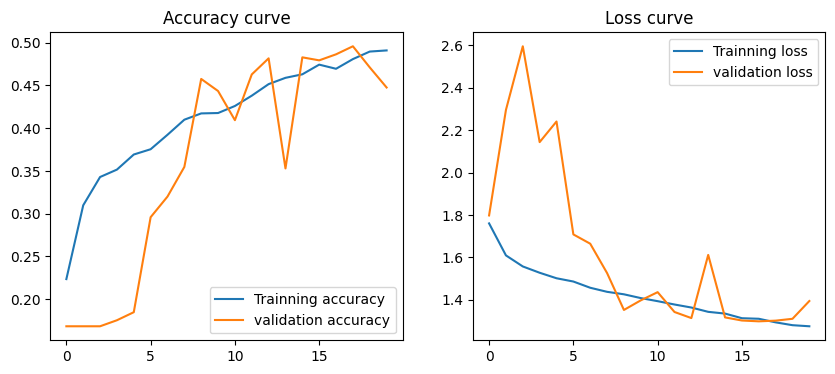

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Trainning accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.title("Accuracy curve")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Trainning loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.title("Loss curve")
plt.legend()


In [ ]:
pred=model.predict(X_test)
print(pred)
y_pred=np.argmax(pred,axis=1)
y_pred_classes=np.argmax(y_test,axis=1)

y_pred_labels=label_encoder.inverse_transform(y_pred)
y_test_labels=label_encoder.inverse_transform(y_pred_classes)
df_pred = pd.DataFrame({
    'Predicted Labels': y_pred_labels,
    'Actual Labels': y_test_labels
})


54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step
[[0.02942237 0.17655711 0.18742184 0.09391825 0.27472025 0.23796019]
 [0.0646633  0.2922199  0.14457977 0.29257476 0.16690883 0.03905343]
 [0.08475588 0.3124733  0.04731413 0.35272276 0.17942011 0.02331387]
 ...
 [0.00701784 0.1662785  0.12911525 0.03397311 0.21643952 0.44717577]
 [0.04664839 0.16637847 0.09712925 0.12636316 0.2785082  0.2849726 ]
 [0.031923   0.2263116  0.2043655  0.12147932 0.23956686 0.1763537 ]]


In [ ]:
df_pred[1:20]

,Predicted Labels,Actual Labels
1,Happy,Neutral
2,Happy,Happy
3,Fear,Fear
4,Fear,Happy
5,Angry,Angry
6,Angry,Angry
7,Sad,Fear
8,Disgust,Sad
9,Neutral,Neutral
10,Happy,Angry


In [ ]:
model.save(filepath=f"E:/final year project/models/model_{accuracy:.2f}.keras")
# model.save_weights(filepath=f"E:/final year project/models/model_{accuracy:.2f}.weights.h5")